In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
conn = sqlite3.connect('parameters.db')

In [3]:
query = """
SELECT tp_k.param_value AS k, tp_l.param_value AS l, tv.value
FROM (
    SELECT trial_id, param_value
    FROM trial_params
    WHERE param_name = 'k'
) AS tp_k
JOIN (
    SELECT trial_id, param_value
    FROM trial_params
    WHERE param_name = 'l'
) AS tp_l
ON tp_k.trial_id = tp_l.trial_id
JOIN trial_values AS tv
ON tp_k.trial_id = tv.trial_id
"""

In [4]:
# Execute the query and load the result into a DataFrame
df = pd.read_sql_query(query, conn)
df_filtered = df[(df['k'] <= 10) & (df['l'] <= 10)]

# Close the connection
conn.close()

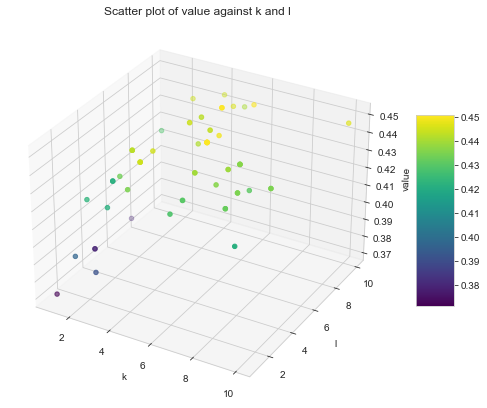

In [5]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_filtered['k'], df_filtered['l'], df_filtered['value'], c=df_filtered['value'], cmap='viridis')

# Labels and title
ax.set_xlabel('k')
ax.set_ylabel('l')
ax.set_zlabel('value')
ax.set_title('Scatter plot of value against k and l')

# Colorbar
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

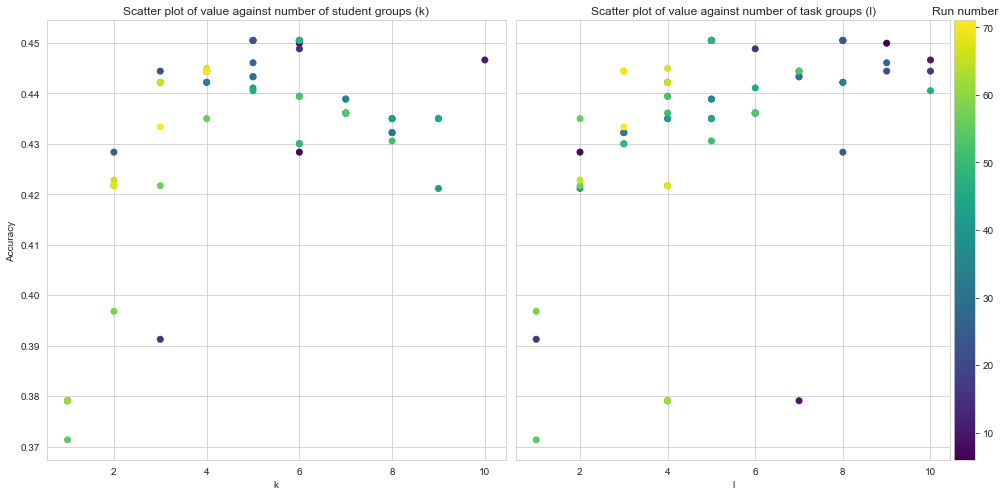

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create subplots for separate scatterplots, side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Scatter plot for 'k', painting each point with a random colour, but that we will maintain in the next plot
scatter_k = ax[0].scatter(df_filtered['k'], df_filtered['value'], c=df_filtered.index, cmap='viridis')
# Add tupple with k and l parameters to each point
#for i, txt in enumerate(zip(df_filtered['k'], df_filtered['l'])):
#    ax[0].annotate(txt, (df_filtered['k'].iloc[i], df_filtered['value'].iloc[i]))


ax[0].set_xlabel('k')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Scatter plot of value against number of student groups (k)')


# Scatter plot for 'l'
scatter_l = ax[1].scatter(df_filtered['l'], df_filtered['value'], c=df_filtered.index, cmap='viridis')
#for i, txt in enumerate(zip(df_filtered['k'], df_filtered['l'])):
#    ax[1].annotate(txt, (df_filtered['k'].iloc[i], df_filtered['value'].iloc[i]))
ax[1].set_xlabel('l')
ax[1].set_title('Scatter plot of value against number of task groups (l)')

# Paint the (3, 3) point in the first scatterplot in red
#scatter_k.set_facecolors(['red' if i == 3 in df_filtered.index])

# Create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)

# Shared colorbar
fig.colorbar(scatter_k, cax=cax)
# Add colorbar title "Run number"
cax.set_title('Run number')

# Show the plots
plt.tight_layout()
plt.show()


In [24]:
# Export the plot to a file
fig.savefig('scatter_plot.png', dpi=300)

In [14]:
df_filtered

,k,l,value
6,6.0,9.0,0.449917
7,6.0,2.0,0.428334
8,6.0,5.0,0.450470
9,8.0,3.0,0.432208
10,1.0,7.0,0.379081
...,...,...,...
67,4.0,4.0,0.444936
68,2.0,4.0,0.421693
69,4.0,3.0,0.444383
70,4.0,3.0,0.444383
